## Previsão de readmissão hospitalar utilizando modelo de Deep Learning

### por Antonildo Santos 

### Introdução
O objetivo desta análise é criar um modelo de Rede Neural Profunda (Deep Learning) capaz prever, com o mais alto grau de precisão possível, os atendimentos propícios a ocorrência de Readmissão Hospitalar.

### Apresentação dos dados

Para realizar este trabalho utilizei um conjunto de dados disponível publicamente no repositório da UCI [Link]( https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008# ). Este conjunto de dados representa 10 anos (1999-2008) de atendimento clínico em 130 hospitais dos EUA, contendo 101.766 observações em 10 anos. Inclui mais de 50 atributos, que representam características do paciente, diagnósticos, exames, etc. As informações foram extraídas do banco de dados contendo registros que satisfizeram os seguintes critérios. 
 
* 1) Cada atendimento representa uma internação hospitalar. 
* 2) Contempla apenas atendimentos de pacientes diabéticos, ou seja, aquele em que qualquer tipo de diabetes foi introduzido no sistema como um diagnóstico. 
* 3) O tempo de permanência foi de no mínimo 1 dia e no máximo 14 dias. 
* 4) Testes laboratoriais foram realizados durante o atendimento. 
* 5) Medicamentos foram administrados durante o atendimento.
 
Os dados contêm atributos como número do paciente, raça, gênero, idade, tipo de internação, tempo no hospital, número de exames laboratoriais realizados, resultado do exame de HbA1c, diagnósticos, número de medicamentos utilizados, se usa medicamentos para diabético e quais, número de pacientes ambulatoriais , internação e visitas de emergência no ano anterior à hospitalização, etc. Alguns desses atributos serão desconsiderados nesta análise pois não terão relevância para o objetivo do trabalho.


###  Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import seaborn as sns  
import matplotlib as mpl
from IPython.display import Image
from sklearn.metrics import mean_squared_error
#import seaborn as sns   
import warnings

%matplotlib inline

### Carga de dados

In [2]:
# Carregando a base de dados
df_uci_diabetic = pd.read_csv('diabetic_data.csv', decimal=b',')

# Criando um novo dataframe a partir do df_uci_diabetic
df = df_uci_diabetic.copy (deep = True)

### Análise Exploratória

In [3]:
print('O Dataframe diabetic_data possui ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas')

O Dataframe diabetic_data possui 101766 linhas e 50 colunas


In [4]:
# examinar os tipos de dados e estatísticas descritivas 
print (df.info ()) 
print (df.describe ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
# Visualizando as primeiras 10 linhas do dataframe
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.describe()

In [6]:
# Verificando a existencia de dados missing (dados faltantes)
for col in df.columns:
    if df[col].dtype == object:
        if df[col][df[col] == '?'].count() > 0:
            print(col,df[col][df[col] == '?'].count(),' Correspondendo a ',np.around((df[col][df[col] == '?'].count()/df[col].count())*100,2), '% das observações')

race 2273  Correspondendo a  2.23 % das observações
weight 98569  Correspondendo a  96.86 % das observações
payer_code 40256  Correspondendo a  39.56 % das observações
medical_specialty 49949  Correspondendo a  49.08 % das observações
diag_1 21  Correspondendo a  0.02 % das observações
diag_2 358  Correspondendo a  0.35 % das observações
diag_3 1423  Correspondendo a  1.4 % das observações


In [7]:
# Avaliando a distribuição dos dados em cada atributo
for col in df.columns:
    if df[col].dtype == object:
        if df[col][df[col] == '?'].count() != 0:       
            print(df.groupby([col])[col].count())
            print('')

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: race, dtype: int64

weight
>200             3
?            98569
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
Name: weight, dtype: int64

payer_code
?     40256
BC     4655
CH      146
CM     1937
CP     2533
DM      549
FR        1
HM     6274
MC    32439
MD     3532
MP       79
OG     1033
OT       95
PO      592
SI       55
SP     5007
UN     2448
WC      135
Name: payer_code, dtype: int64

medical_specialty
?                                       49949
AllergyandImmunology                        7
Anesthesiology                             12
Anesthesiology-Pediatric                   19
Cardiology                               5352
Cardiology-Pediatric                        7
DCPTEAM                                  

In [8]:
# Avaliando a distribuição dos dados em cada atributo
for col in df.columns:
    if df[col].dtype == object:
        if df[col][df[col] == '?'].count() == 0:       
            print(df.groupby([col])[col].count())
            print('')

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: age, dtype: int64

max_glu_serum
>200     1485
>300     1264
None    96420
Norm     2597
Name: max_glu_serum, dtype: int64

A1Cresult
>7       3812
>8       8216
None    84748
Norm     4990
Name: A1Cresult, dtype: int64

metformin
Down        575
No        81778
Steady    18346
Up         1067
Name: metformin, dtype: int64

repaglinide
Down          45
No        100227
Steady      1384
Up           110
Name: repaglinide, dtype: int64

nateglinide
Down          11
No        101063
Steady       668
Up            24
Name: nateglinide, dtype: int64

chlorpropamide
Down           1
No        101680
Steady        79
Up             6
Name: chlorpropamide, dtype: int64

glimepiride
Down        194
N

In [9]:
# Verificando a mediana
for col in df.columns:
    if df[col].dtype != object:
        print(col, df[col].median())
        print('')

encounter_id 152388987.0

patient_nbr 45505143.0

admission_type_id 1.0

discharge_disposition_id 1.0

admission_source_id 7.0

time_in_hospital 4.0

num_lab_procedures 44.0

num_procedures 1.0

num_medications 15.0

number_outpatient 0.0

number_emergency 0.0

number_inpatient 0.0

number_diagnoses 8.0



### Limpeza e Transformação dos dados

Os critérios de eliminação de atributos e observações depende muito da interpretação dos dados feita pelo Cientista de Dados na fase de exploração. Estes critérios passam pela avaliação de cada atributo do conjunto de dados, verificação da distribuição de frequência, analise de correlações entre variáveis, modelo preditivo que será aplicado, além de um certo conhecimento do negócio em estudo, para então decidir quais atributos e/ou observações devem ser descartados. Considerando o conjunto de dados em questão, decidi eliminar alguns atributos nos quais avalio que não impactará no resultado das análises preditivas. Descartarei os atributos "encounter_id", "patient_nbr", "weight", "payer_code", "examide", "citoglipton" e "medical_specialty". Por exemplo o atributo "weight", que corresponde ao peso do paciente, seria um atributo muito importante a ser considerado na análise, porém em 97% das observação este atributo está sem valor, tornando-se um dado insuficientemente consistente para o modelo aplicar algum tipo de generalização.

Com base na consulta a documentação disponibilizada pelo repositório dos dados e entendimento de cada atributo do conjunto de dados, decidi também eliminar algumas observações que acredito não impactar no objetivo proposta neste trabalho. Precisarei também transformar alguns dados, com o objetivo de prepará-los para serem entregue ao modelo preditivo proposto.

In [10]:
# Eliminando colunas que não serão utilizadas
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'examide', 'citoglipton', 'medical_specialty'], axis = 1, inplace = True)

#### Categorização de diagnósticos
No conjunto de dados existem três diagnosticos, um principal e dois secundários, contendo em média 752 codigos distintos em cada um, por isso resolvi realizar um reagrupamento com base numa análise realizada por Strack et al. em 2014, sobre o mesmo tema e utilizando o mesmo conjunto de dados, publicado em ( https://www.hindawi.com/journals/bmri/2014/781670/abs/ ). 

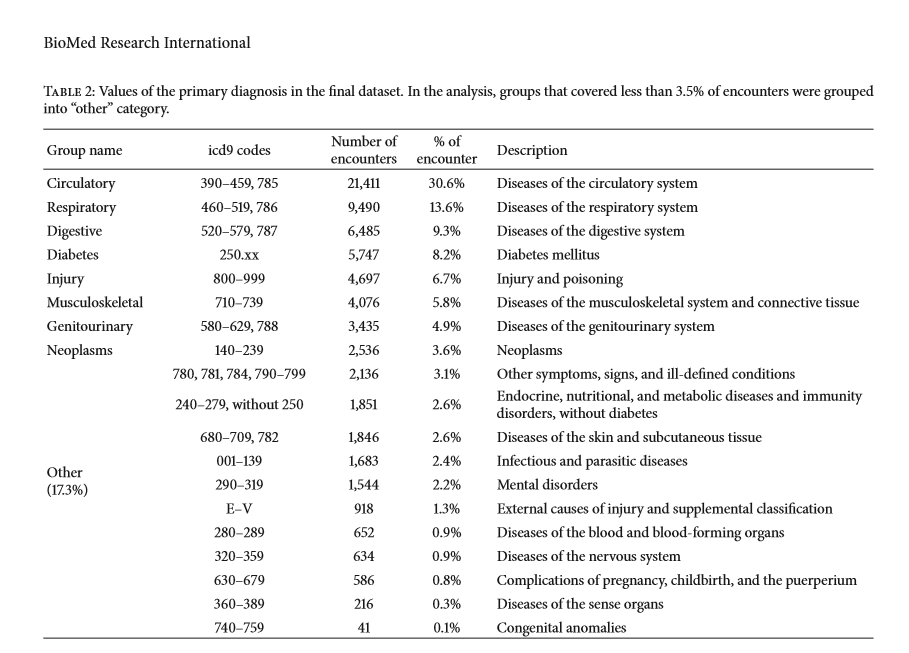

In [11]:
Image('Agrupamento_CID_9.png')

In [12]:
# Criando novas colunas para atribuir os valores transformados
df['d1'] = df['diag_1']
df['d2'] = df['diag_2']
df['d3'] = df['diag_3']
df['classe'] = -1
df['change_t'] = -1
df['gender_t'] = -1
df['diabetesMed_t'] = -1

In [13]:
# Reagrupamento do diagnóstico principal
df['d1'] = df.apply(lambda row: 1 if (row['diag_1'][0:3].zfill(3) >= '390') and (row['diag_1'][0:3].zfill(3) <= '459' ) or  (row['diag_1'][0:3].zfill(3) == '785' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 2 if (row['diag_1'][0:3].zfill(3) >= '460') and (row['diag_1'][0:3].zfill(3) <= '519' ) or  (row['diag_1'][0:3].zfill(3) == '786' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 3 if (row['diag_1'][0:3].zfill(3) >= '520') and (row['diag_1'][0:3].zfill(3) <= '579' ) or  (row['diag_1'][0:3].zfill(3) == '787' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 4 if (row['diag_1'][0:3].zfill(3) == '250') else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 5 if (row['diag_1'][0:3].zfill(3) >= '800') and (row['diag_1'][0:3].zfill(3) <= '999' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 6 if (row['diag_1'][0:3].zfill(3) >= '710') and (row['diag_1'][0:3].zfill(3) <= '739' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 7 if (row['diag_1'][0:3].zfill(3) >= '580') and (row['diag_1'][0:3].zfill(3) <= '629' ) or  (row['diag_1'][0:3].zfill(3) == '788' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 8 if (row['diag_1'][0:3].zfill(3) >= '140') and (row['diag_1'][0:3].zfill(3) <= '239' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 9 if (row['diag_1'][0:3].zfill(3) >= '790') and (row['diag_1'][0:3].zfill(3) <= '799' ) or  (row['diag_1'][0:3].zfill(3) == '780' ) or  (row['diag_1'][0:3].zfill(3) == '781' ) or  (row['diag_1'][0:3].zfill(3) == '784' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 10 if (row['diag_1'][0:3].zfill(3) >= '240') and (row['diag_1'][0:3].zfill(3) <= '249' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 10 if (row['diag_1'][0:3].zfill(3) >= '251') and (row['diag_1'][0:3].zfill(3) <= '279' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 11 if (row['diag_1'][0:3].zfill(3) >= '680') and (row['diag_1'][0:3].zfill(3) <= '709' ) or  (row['diag_1'][0:3].zfill(3) == '782' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 12 if (row['diag_1'][0:3].zfill(3) >= '001') and (row['diag_1'][0:3].zfill(3) <= '139' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '290') and (row['diag_1'][0:3].zfill(3) <= '319' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:1] >= 'E') and (row['diag_1'][0:1] <= 'V' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '280') and (row['diag_1'][0:3].zfill(3) <= '289' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '320') and (row['diag_1'][0:3].zfill(3) <= '359' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '630') and (row['diag_1'][0:3].zfill(3) <= '679' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '360') and (row['diag_1'][0:3].zfill(3) <= '389' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 13 if (row['diag_1'][0:3].zfill(3) >= '740') and (row['diag_1'][0:3].zfill(3) <= '759' ) else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: 0 if (row['diag_1'][0:3].zfill(3)  == '783' or row['diag_1'][0:3].zfill(3)  == '789') else row['d1'], axis=1)
df['d1'] = df.apply(lambda row: -1 if (row['diag_1'][0:1] == '?') else row['d1'], axis=1)                           

In [14]:
# Reagrupamento do primeiro diagnóstico secundário
df['d2'] = df.apply(lambda row: 1 if (row['diag_2'][0:3].zfill(3) >= '390') and (row['diag_2'][0:3].zfill(3) <= '459' ) or  (row['diag_2'][0:3].zfill(3) == '785' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 2 if (row['diag_2'][0:3].zfill(3) >= '460') and (row['diag_2'][0:3].zfill(3) <= '519' ) or  (row['diag_2'][0:3].zfill(3) == '786' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 3 if (row['diag_2'][0:3].zfill(3) >= '520') and (row['diag_2'][0:3].zfill(3) <= '579' ) or  (row['diag_2'][0:3].zfill(3) == '787' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 4 if (row['diag_2'][0:3].zfill(3) == '250') else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 5 if (row['diag_2'][0:3].zfill(3) >= '800') and (row['diag_2'][0:3].zfill(3) <= '999' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 6 if (row['diag_2'][0:3].zfill(3) >= '710') and (row['diag_2'][0:3].zfill(3) <= '739' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 7 if (row['diag_2'][0:3].zfill(3) >= '580') and (row['diag_2'][0:3].zfill(3) <= '629' ) or  (row['diag_2'][0:3].zfill(3) == '788' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 8 if (row['diag_2'][0:3].zfill(3) >= '140') and (row['diag_2'][0:3].zfill(3) <= '239' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 9 if (row['diag_2'][0:3].zfill(3) >= '790') and (row['diag_2'][0:3].zfill(3) <= '799' ) or  (row['diag_2'][0:3].zfill(3) == '780' ) or  (row['diag_2'][0:3].zfill(3) == '781' ) or  (row['diag_2'][0:3].zfill(3) == '784' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 10 if (row['diag_2'][0:3].zfill(3) >= '240') and (row['diag_2'][0:3].zfill(3) <= '249' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 10 if (row['diag_2'][0:3].zfill(3) >= '251') and (row['diag_2'][0:3].zfill(3) <= '279' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 11 if (row['diag_2'][0:3].zfill(3) >= '680') and (row['diag_2'][0:3].zfill(3) <= '709' ) or  (row['diag_2'][0:3].zfill(3) == '782' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 12 if (row['diag_2'][0:3].zfill(3) >= '001') and (row['diag_2'][0:3].zfill(3) <= '139' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '290') and (row['diag_2'][0:3].zfill(3) <= '319' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:1] >= 'E') and (row['diag_2'][0:1] <= 'V' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '280') and (row['diag_2'][0:3].zfill(3) <= '289' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '320') and (row['diag_2'][0:3].zfill(3) <= '359' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '630') and (row['diag_2'][0:3].zfill(3) <= '679' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '360') and (row['diag_2'][0:3].zfill(3) <= '389' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 13 if (row['diag_2'][0:3].zfill(3) >= '740') and (row['diag_2'][0:3].zfill(3) <= '759' ) else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: 0 if (row['diag_2'][0:3].zfill(3)  == '783' or row['diag_2'][0:3].zfill(3)  == '789') else row['d2'], axis=1)
df['d2'] = df.apply(lambda row: -1 if (row['diag_2'][0:1] == '?') else row['d2'], axis=1)                           

In [15]:
# Reagrupamento do segundo diagnóstico secundário
df['d3'] = df.apply(lambda row: 1 if (row['diag_3'][0:3].zfill(3) >= '390') and (row['diag_3'][0:3].zfill(3) <= '459' ) or  (row['diag_3'][0:3].zfill(3) == '785' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 2 if (row['diag_3'][0:3].zfill(3) >= '460') and (row['diag_3'][0:3].zfill(3) <= '519' ) or  (row['diag_3'][0:3].zfill(3) == '786' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 3 if (row['diag_3'][0:3].zfill(3) >= '520') and (row['diag_3'][0:3].zfill(3) <= '579' ) or  (row['diag_3'][0:3].zfill(3) == '787' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 4 if (row['diag_3'][0:3].zfill(3) == '250') else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 5 if (row['diag_3'][0:3].zfill(3) >= '800') and (row['diag_3'][0:3].zfill(3) <= '999' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 6 if (row['diag_3'][0:3].zfill(3) >= '710') and (row['diag_3'][0:3].zfill(3) <= '739' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 7 if (row['diag_3'][0:3].zfill(3) .zfill(3)>= '580') and (row['diag_3'][0:3].zfill(3) <= '629' ) or  (row['diag_3'][0:3].zfill(3) == '788' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 8 if (row['diag_3'][0:3].zfill(3) >= '140') and (row['diag_3'][0:3].zfill(3) <= '239' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 9 if (row['diag_3'][0:3].zfill(3) >= '790') and (row['diag_3'][0:3].zfill(3) <= '799' ) or  (row['diag_3'][0:3].zfill(3) == '780' ) or  (row['diag_3'][0:3].zfill(3) == '781' ) or  (row['diag_3'][0:3].zfill(3) == '784' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 10 if (row['diag_3'][0:3].zfill(3) >= '240') and (row['diag_3'][0:3].zfill(3) <= '249' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 10 if (row['diag_3'][0:3].zfill(3) >= '251') and (row['diag_3'][0:3].zfill(3) <= '279' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 11 if (row['diag_3'][0:3].zfill(3) >= '680') and (row['diag_3'][0:3].zfill(3) <= '709' ) or  (row['diag_3'][0:3].zfill(3) == '782' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 12 if (row['diag_3'][0:3].zfill(3) >= '001') and (row['diag_3'][0:3].zfill(3) <= '139' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '290') and (row['diag_3'][0:3].zfill(3) <= '319' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:1] >= 'E') and (row['diag_3'][0:1] <= 'V' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '280') and (row['diag_3'][0:3].zfill(3) <= '289' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '320') and (row['diag_3'][0:3].zfill(3) <= '359' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '630') and (row['diag_3'][0:3].zfill(3) <= '679' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '360') and (row['diag_3'][0:3].zfill(3) <= '389' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 13 if (row['diag_3'][0:3].zfill(3) >= '740') and (row['diag_3'][0:3].zfill(3) <= '759' ) else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: 0 if (row['diag_3'][0:3].zfill(3)  == '783' or row['diag_3'][0:3].zfill(3)  == '789') else row['d3'], axis=1)
df['d3'] = df.apply(lambda row: -1 if (row['diag_3'][0:1] == '?') else row['d3'], axis=1)                           

In [16]:
print(df.groupby(['d1', 'diag_1']).d2.count())

d1   diag_1
-1   ?           21
 0   783         29
     789        561
 1   391          1
     394         11
     395          5
     396         30
     397          5
     398        128
     401        346
     402        449
     403        513
     404        262
     405          3
     410       3614
     411        254
     412          1
     413        117
     414       6581
     415        449
     416         68
     417          2
     420         64
     421         41
     422          2
     423         72
     424        183
     425         86
     426        288
     427       2766
               ... 
 13  665          3
     669          3
     671          1
     674          4
     745          7
     746          7
     747          7
     751          5
     753          5
     756         15
     759          5
     E909         1
     V07          1
     V25          1
     V26          2
     V43          1
     V45          5
     V51          1
     V53

In [17]:
print(df.groupby(['d2', 'diag_2']).d2.count())

d2   diag_2
-1   ?          358
 0   783         24
     789        343
 1   394         21
     395          3
     396        179
     397         68
     398         39
     401       3736
     402        335
     403       2823
     404        203
     405          3
     410        549
     411       2566
     412        102
     413       1042
     414       2650
     415        107
     416         96
     420         25
     421         21
     422          4
     423         16
     424       1071
     425       1434
     426        301
     427       5036
     428       6662
     429         32
               ... 
 13  V15        128
     V16          2
     V17          9
     V18          8
     V23          3
     V25          1
     V42        264
     V43        130
     V44         11
     V45        408
     V46         11
     V49         39
     V50          1
     V53          2
     V54         78
     V55          2
     V57          9
     V58        157
     V60

In [18]:
print(df.groupby(['d3', 'diag_3']).d3.count())

d3   diag_3
-1   ?         1423
 0   783         57
     789        290
 1   391          1
     394         17
     395          1
     396        229
     397        150
     398         28
     401       8289
     402        375
     403       2357
     404        124
     405          9
     410        209
     411        399
     412        346
     413        329
     414       3664
     415         33
     416        170
     417          3
     420         10
     421          6
     423         25
     424       1063
     425       1136
     426        272
     427       3955
     428       4577
               ... 
 13  V15        334
     V16          7
     V17         22
     V18         15
     V22          1
     V23          4
     V25          2
     V27         37
     V42        243
     V43        211
     V44         27
     V45       1389
     V46         60
     V49         54
     V53          7
     V54         58
     V55          8
     V57          7
     V58

Conforme consta na documentação, trata-se de um do conjunto de dados contendo atendimentos onde qualquer tipo de diabetes foi introduzido no sistema como um diagnóstico, então eliminarei as observações onde não existe nenhum diagnóstico registrado.

In [19]:
df = df[(df.d1 > -1) | (df.d2 > -1) | (df.d3 > -1)]

In [20]:
# Eliminando as colunas originais do diagnósticos
df.drop(['diag_1'], axis = 1, inplace = True)
df.drop(['diag_2'], axis = 1, inplace = True)
df.drop(['diag_3'], axis = 1, inplace = True)

### Aplicando a transformação dos dados

In [21]:
# Atribui a classe os valores 1 ou 0, correspondendo a ocorrencias de readmissão em menos de 30 dias ou não 
df['classe'] = df.apply(lambda row: 0 if (row['readmitted'][0:3] == '>30' or row['readmitted'][0:2] == 'NO') else row['classe'], axis=1) 
df['classe'] = df.apply(lambda row: 1 if (row['readmitted'][0:3] == '<30') else row['classe'], axis=1)
df.drop(['readmitted'], axis = 1, inplace = True)

In [22]:
df['change_t'] = df.apply(lambda row: 1 if (row['change'] == 'Ch') else -1, axis=1)
df['change_t'] = df.apply(lambda row: 0 if (row['change'] == 'No') else row['change_t'], axis=1)
df.drop(['change'], axis = 1, inplace = True)

In [23]:
df['gender_t'] = df.apply(lambda row: 1 if (row['gender'] == 'Male') else -1, axis=1)
df['gender_t'] = df.apply(lambda row: 0 if (row['gender'] == 'Female') else row['gender_t'], axis=1)
df.drop(['gender'], axis = 1, inplace = True)

In [24]:
df['diabetesMed_t'] = df.apply(lambda row: 1 if (row['diabetesMed'] == 'Yes') else -1, axis=1)
df['diabetesMed_t'] = df.apply(lambda row: 0 if (row['diabetesMed'] == 'No') else row['diabetesMed_t'], axis=1)
df.drop(['diabetesMed'], axis = 1, inplace = True)

In [25]:
m = 0
medicacoes = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
              'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
              'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
              'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in df.columns:
    if col in medicacoes:       
        colname = 'Med' + str(m) + '_t'
        df[colname] = df.apply(lambda row: 0 if (row[col] == 'No') else 1, axis=1)
        df.drop([col], axis = 1, inplace = True)
        m = m + 1

In [26]:
df['A1Cresult_t'] = df.apply(lambda row: 0 if (row['A1Cresult'][0:4] == 'Norm') else -1, axis=1) 
df['A1Cresult_t'] = df.apply(lambda row: 1 if (row['A1Cresult'][0:2] == '>7' or row['A1Cresult'][0:2] == '>8') else row['A1Cresult_t'], axis=1) 
df.drop(['A1Cresult'], axis = 1, inplace = True)

In [27]:
df['max_glu_serum_t'] = df.apply(lambda row: 0 if (row['max_glu_serum'][0:4] == 'Norm') else -1, axis=1) 
df['max_glu_serum_t'] = df.apply(lambda row: 1 if (row['max_glu_serum'][0:2] == '>7' or row['max_glu_serum'][0:2] == '>8') else row['max_glu_serum_t'], axis=1) 
df.drop(['max_glu_serum'], axis = 1, inplace = True)

In [28]:
df['age_faixa'] = df.apply(lambda row: 0 if (row['age'] == '[0-10)') else -1, axis=1) 
df['age_faixa'] = df.apply(lambda row: 1 if (row['age'] == '[10-20)') else row['age_faixa'], axis=1)
df['age_faixa'] = df.apply(lambda row: 2 if (row['age'] == '[20-30)') else row['age_faixa'], axis=1) 
df['age_faixa'] = df.apply(lambda row: 3 if (row['age'] == '[30-40)') else row['age_faixa'], axis=1)
df['age_faixa'] = df.apply(lambda row: 4 if (row['age'] == '[40-50)') else row['age_faixa'], axis=1) 
df['age_faixa'] = df.apply(lambda row: 5 if (row['age'] == '[50-60)') else row['age_faixa'], axis=1)
df['age_faixa'] = df.apply(lambda row: 6 if (row['age'] == '[70-80)') else row['age_faixa'], axis=1) 
df['age_faixa'] = df.apply(lambda row: 7 if (row['age'] == '[80-90)') else row['age_faixa'], axis=1)
df['age_faixa'] = df.apply(lambda row: 8 if (row['age'] == '[90-100)') else row['age_faixa'], axis=1)
df.drop(['age'], axis = 1, inplace = True)

In [29]:
df['race_t'] = df.apply(lambda row: 0 if (row['race'] == '?') else -1, axis=1) 
df['race_t'] = df.apply(lambda row: 1 if (row['race'] == 'AfricanAmerican') else row['race_t'], axis=1)
df['race_t'] = df.apply(lambda row: 2 if (row['race'] == 'Asian') else row['race_t'], axis=1) 
df['race_t'] = df.apply(lambda row: 3 if (row['race'] == 'Caucasian') else row['race_t'], axis=1)
df['race_t'] = df.apply(lambda row: 4 if (row['race'] == 'Hispanic') else row['race_t'], axis=1) 
df['race_t'] = df.apply(lambda row: 5 if (row['race'] == 'Other') else row['race_t'], axis=1)
df.drop(['race'], axis = 1, inplace = True)

In [ ]:
# Salvando o dataset com as tranformações realizadas
df.to_csv('./diabetes_data_modificado.csv', index=False)

In [2]:
# Carregando a base de dados
df = pd.read_csv('diabetes_data_modificado.csv', decimal=b',')

In [31]:
df.head(10)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,Med15_t,Med16_t,Med17_t,Med18_t,Med19_t,Med20_t,A1Cresult_t,max_glu_serum_t,age_faixa,race_t
0,6,25,1,1,41,0,1,0,0,0,...,0,0,0,0,0,0,-1,-1,0,3
1,1,1,7,3,59,0,18,0,0,0,...,1,0,0,0,0,0,-1,-1,1,3
2,1,1,7,2,11,5,13,2,0,1,...,0,0,0,0,0,0,-1,-1,2,1
3,1,1,7,2,44,1,16,0,0,0,...,1,0,0,0,0,0,-1,-1,3,3
4,1,1,7,1,51,0,8,0,0,0,...,1,0,0,0,0,0,-1,-1,4,3
5,2,1,2,3,31,6,16,0,0,0,...,1,0,0,0,0,0,-1,-1,5,3
6,3,1,2,4,70,1,21,0,0,0,...,1,0,0,0,0,0,-1,-1,-1,3
7,1,1,7,5,73,0,12,0,0,0,...,0,0,0,0,0,0,-1,-1,6,3
8,2,1,4,13,68,2,28,0,0,0,...,1,0,0,0,0,0,-1,-1,7,3
9,3,3,4,12,33,3,18,0,0,0,...,1,0,0,0,0,0,-1,-1,8,3


In [ ]:
print (df.info ()) 

In [32]:
print(df.groupby(['classe']).classe.count())

classe
0    90408
1    11357
Name: classe, dtype: int64


### Construção do Modelo Preditivo

O indicador de Readmissão Hospitalar  mede a taxa de pacientes que retornaram ao hospital em até 30 dias desde a última alta hospitalar correspondente a primeira admissão. Este indicador avalia a capacidade progressiva do prestador de serviço em ajudar na recuperação do paciente. Nos Estados unidos, várias iniciativas já foram tomadas para garantir o sucesso da recuperação da saúde de seus pacientes, usando técnicas de trabalho em equipe a tecnologia para diminuir a readmissão hospitalar.

A taxa de readmissão hospitalar é frequentemente usada como uma medida da qualidade assistencial de um hospital, segundo determina a ANS, o indicador de Readmissão Hospitalar é um dos critérios para o estabelecimento alcançar o reajuste de 100% do IPCA, consequentemente uma alta taxa de readmissão pode afetar o índice de reajuste dos contratos firmados entre operadoras de planos de saúde e prestadores de serviço. Segundo a diretora-adjunta de Desenvolvimento Setorial da ANS, Michelle Mello “Esse é um indicador internacional clássico para avaliação da qualidade de atendimento e cuidado prestados ao paciente nos hospitais. Quanto menor for a reincidência de internação, ou seja, quanto menor for a readmissão potencialmente evitável, melhor é considerado o atendimento prestado pela unidade hospitalar”.

Um dos grandes desafios dos hospitais é identificar as readmissões que poderiam ser evitadas. Ser capaz de prever quais pacientes serão readmitidos pode ajudar os hospitais e operadoras de plano de saúde a economizar milhões de reais e melhorar a qualidade dos cuidados e recuperação dos pacientes

O objetivo deste trabalhe é implementar um modelo de Deep Learning, capaz de classificar os pacientes que serão readmitidos, com o mais alto grau de precisão possível. Um dos desafios ao analisar este conjunto de dados é o enorme desequilíbrio da variável target: as readmissões com menos de 30 dias correspondem apenas 11,16% dos atendimentos. Nesse caso, é muito pior ter falsos negativos do que falsos positivos em nossas previsões, pois falsos negativos significam que algum paciente foi readmitido, porém o modelo não foi capaz de prever, isso poderá comprometer os idicadores de qualidade da instituição. 

In [3]:
# Pacotes de Manipulação de Dados
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.preprocessing import scale, MinMaxScaler, MultiLabelBinarizer, QuantileTransformer, Normalizer, StandardScaler, MaxAbsScaler, RobustScaler

# Keras e TensorFlow

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
import tensorflow as tf

# Pacotes para Confusion Matrix e Balanceamento de Classes
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
import imblearn

C:\Users\anton\Anaconda3\envs\theano\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


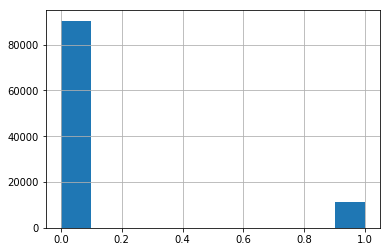

In [34]:
df['classe'].hist()
plt.show()

In [35]:
print('O Dataframe diabetic_data_modificado possui ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas')

O Dataframe diabetic_data_modificado possui 101765 linhas e 43 colunas


In [63]:
readmissoes = df.loc[df['classe'] == 1]
nao_readmissoes = df.loc[df['classe'] == 0]
print("Temos", len(readmissoes), "pontos de dados como readmissões e", len(nao_readmissoes), "pontos de dados considerados normais.")

Temos 11357 pontos de dados como readmissões e 90408 pontos de dados considerados normais.


In [64]:
# Atribuido valores as variáveis X e y do dodelo
X = df.iloc[:,:-1]
y = df['classe']

# Aplicando Scala e Redução de dimensionalidade com PCA
X = scale(X)
pca = PCA(n_components = 10, random_state=38)
X = pca.fit_transform(X)

# Gerando dados de treino, teste e validação
X1, X_valid, y1, y_valid = train_test_split(X, y, test_size = 0.10, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.26, random_state = 0)

In [65]:
print("Tamanho do Dataset de Treino: ", X_train.shape)

Tamanho do Dataset de Treino:  (67775, 10)


In [66]:
print("Tamanho do Dataset de Validaçao: ", X_valid.shape)

Tamanho do Dataset de Validaçao:  (10177, 10)


In [67]:
print("Tamanho do Dataset de Test: ", X_test.shape)

Tamanho do Dataset de Test:  (23813, 10)


### Começando com uma Rede Neural Simples

In [68]:
model = Sequential()
model.add(Dense(10, input_dim = 10, activation = 'relu'))     
model.add(Dense(1, activation = 'sigmoid'))                
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train, y_train, epochs = 1, validation_data=(X_valid, y_valid))

Train on 67775 samples, validate on 10177 samples
Epoch 1/1
67775/67775 [==============================] - 10s 154us/step - loss: 0.2800 - acc: 0.8971 - val_loss: 0.2492 - val_acc: 0.9070


In [70]:
print("Erro/Acurácia: ", model.evaluate(X_valid, y_valid, verbose = 0))

Erro/Acurácia:  [0.24923400468578902, 0.9070452982214798]


In [71]:
y_predicted = model.predict(X_valid).T[0].astype(int)

Confusion matrix:
Predicted      0  1  __all__
Actual                      
0           9046  0     9046
1           1131  0     1131
__all__    10177  0    10177


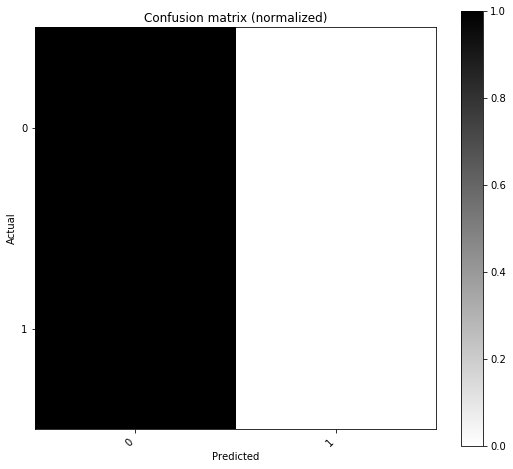

Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0           9046  0     9046
1           1131  0     1131
__all__    10177  0    10177


Overall Statistics:

Accuracy: 0.8888670531590842
95% CI: (0.8826000161171167, 0.8949105853310739)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0         1
Population                                10177     10177
P: Condition positive                      9046      1131
N: Condition negative                      1131      9046
Test outcome positive                     10177         0
Test outcome negative                         0     10177
TP: True Positive                          9046         0
TN: True Negative                             0      9046
FP: False Positive                         1131         0
FN: False Negative                            0      1131
TPR: (Sensitivity, hit rate, recall)       

In [72]:
from pandas_ml import ConfusionMatrix
import warnings
warnings.filterwarnings('ignore')
y_right = np.array(y_valid)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

Podemos observar que apesar do modelo está demonstrando uma acurácia de aproximadamente 88%, analisando a ConfusionMatrix percebemos que os resultados não foram satisfatório, consequencia do desbalanciamento dos dados. Então vamos aplicar um oversampling para corrigir um viés no conjunto de dados original, empregando Synthetic Minority Over-sampling Technique para balancear os dados. 

### Aplicando Oversampling

In [73]:
df2 = pdml.ModelFrame(X, target=y.ravel())
sampler = df2.imbalance.over_sampling.SMOTE(random_state=42, ratio='minority')
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,1:], oversampled.iloc[:,0]
X2 = X2.values

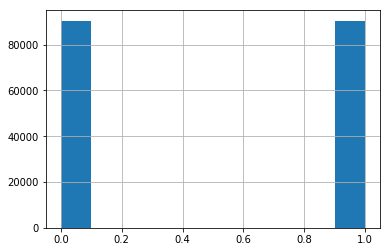

In [74]:
oversampled.iloc[:,0].hist()
plt.show()

### Gerando dados de Treino

Os dados balanceados servirão para gerar apenas o conjunto de dados treino, para que os dados sintéticos gerados não vazem para os conjuntos de teste e validação.

In [75]:
# Gerando dados de treino com base nos dados balanceados
X2_train, X_test_, y2_train, y_test_ = train_test_split(X2, y2.as_matrix(), test_size = 0.33, random_state = 0)

### Aumentando o Número de Camadas na Rede Neural

In [76]:
from keras.callbacks import EarlyStopping
from tensorflow import set_random_seed
import keras as keras
from sklearn.metrics import precision_score, recall_score

In [77]:
#OPTIMIZER = Adam(lr=0.01, beta_1=0.99, beta_2=0.999, amsgrad=True) # otimizador
OPTIMIZER = RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)

In [78]:
# Classe para calcular a metrica de acurácia com base no recall
class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self._data = []

    def on_epoch_end(self, batch, logs={}):
        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_predict = np.round(model2.predict(X_val)).T[0]
    
        self._data.append({
            'val_recall': recall_score(y_val, np.round(model2.predict(X_val)).T[0]),
            'val_precision': precision_score(y_val, np.round(model2.predict(X_val)).T[0]),
        })
        return

    def get_data(self):
        return self._data

In [79]:
batch_size = 8790
seed = 100
set_random_seed(seed)
metrics = Metrics()

In [80]:
model2 = Sequential()
model2.add(Dense(10, input_dim = 10,   kernel_initializer='ones', activation = 'tanh')) 
model2.add(Dense(1024, activation = 'tanh'))
model2.add(Dropout(0.40))
model2.add(Dense(16, activation = 'tanh'))
model2.add(Dropout(0.40))
model2.add(Dense(8,  activation = 'tanh'))
model2.add(Dropout(0.40))
model2.add(Dense(4,  activation = 'tanh'))
model2.add(Dropout(0.40))
model2.add(Dense(2,  activation = 'tanh'))
model2.add(Dropout(0.40))
model2.add(Dense(1,  activation = 'sigmoid'))
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')   
model2.compile(loss = 'binary_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              11264     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_17 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_18 (Dropout)         (None, 8)                 0         
__________

In [81]:
history = model2.fit(X2_train, y2_train, epochs = 100, batch_size = batch_size, validation_data=(X_valid, y_valid), callbacks = [monitor, metrics], shuffle=False)

Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 1s 9us/step - loss: 0.7098 - acc: 0.5345 - val_loss: 0.6671 - val_acc: 0.5815
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.6828 - acc: 0.5604 - val_loss: 0.6058 - val_acc: 0.6531
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.6590 - acc: 0.6130 - val_loss: 0.6506 - val_acc: 0.6239
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.6315 - acc: 0.6636 - val_loss: 0.5862 - val_acc: 0.6846
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.6100 - acc: 0.6901 - val_loss: 0.5835 - val_acc: 0.6990
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5937 - acc: 0.7070 - val_loss: 0.5415 - val_acc: 0.7365
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5743 - acc: 0.7245 - val_loss: 0

In [82]:
# Efetua o treinamento até atingir uma precisão no recall acima de 95%
Maxrecall = 0
Maxprecision = 0
for i in range(5980,8790,10):
    batch_size = i
    print(i)
    metrics = Metrics()
    history = model2.fit(X2_train, y2_train, epochs = 100,  batch_size = batch_size, validation_data=(X_valid, y_valid), callbacks = [monitor, metrics], shuffle=False)
    if recall_score(y_test,np.round(model2.predict(X_test)).T[0]) > Maxrecall and precision_score(y_test,np.round(model2.predict(X_test)).T[0]) > Maxprecision:
        print(recall_score(y_test,np.round(model2.predict(X_test)).T[0]), i)
        Maxrecall = recall_score(y_test,np.round(model2.predict(X_test)).T[0])
        Maxprecision = precision_score(y_test,np.round(model2.predict(X_test)).T[0])
        if Maxrecall > 0.95:
            break
#    metrics.get_data()

5980
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5358 - acc: 0.7562 - val_loss: 0.4950 - val_acc: 0.7881
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5379 - acc: 0.7527 - val_loss: 0.4834 - val_acc: 0.7910
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5347 - acc: 0.7550 - val_loss: 0.4909 - val_acc: 0.7854
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5349 - acc: 0.7555 - val_loss: 0.4870 - val_acc: 0.7929
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5334 - acc: 0.7561 - val_loss: 0.4720 - val_acc: 0.8061
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5340 - acc: 0.7546 - val_loss: 0.4735 - val_acc: 0.8021
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.5304 - acc: 0.7579 - val_lo

121146/121146 [==============================] - 0s 3us/step - loss: 0.4578 - acc: 0.7918 - val_loss: 0.3536 - val_acc: 0.8723
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4595 - acc: 0.7915 - val_loss: 0.3293 - val_acc: 0.8889
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4541 - acc: 0.7918 - val_loss: 0.3451 - val_acc: 0.8792
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4544 - acc: 0.7934 - val_loss: 0.3210 - val_acc: 0.8973
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4533 - acc: 0.7923 - val_loss: 0.3239 - val_acc: 0.8899
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4492 - acc: 0.7962 - val_loss: 0.3563 - val_acc: 0.8589
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4469 - acc: 0.7950 - val_loss: 0.2797 - val_acc: 0.9181
Epoch 11/100
121146/121146 [==========

121146/121146 [==============================] - 0s 3us/step - loss: 0.4271 - acc: 0.8044 - val_loss: 0.3125 - val_acc: 0.8862
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4299 - acc: 0.8023 - val_loss: 0.2912 - val_acc: 0.9005
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4284 - acc: 0.8049 - val_loss: 0.2968 - val_acc: 0.8982
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4286 - acc: 0.8053 - val_loss: 0.2822 - val_acc: 0.9038
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4254 - acc: 0.8069 - val_loss: 0.3340 - val_acc: 0.8633
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4285 - acc: 0.8030 - val_loss: 0.2887 - val_acc: 0.9006
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4271 - acc: 0.8048 - val_loss: 0.3149 - val_acc: 0.8874
Epoch 9/100
121146/121146 [============

121146/121146 [==============================] - 0s 3us/step - loss: 0.4166 - acc: 0.8106 - val_loss: 0.2781 - val_acc: 0.9050
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4220 - acc: 0.8088 - val_loss: 0.3127 - val_acc: 0.8881
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4198 - acc: 0.8087 - val_loss: 0.2864 - val_acc: 0.8992
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4213 - acc: 0.8073 - val_loss: 0.3196 - val_acc: 0.8821
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4206 - acc: 0.8081 - val_loss: 0.3007 - val_acc: 0.8931
Epoch 00007: early stopping
6150
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4187 - acc: 0.8075 - val_loss: 0.2799 - val_acc: 0.9033
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4190 - acc:

121146/121146 [==============================] - 0s 3us/step - loss: 0.4190 - acc: 0.8092 - val_loss: 0.2968 - val_acc: 0.8955
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4152 - acc: 0.8130 - val_loss: 0.2740 - val_acc: 0.9059
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4169 - acc: 0.8087 - val_loss: 0.3294 - val_acc: 0.8751
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4142 - acc: 0.8090 - val_loss: 0.2868 - val_acc: 0.8973
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4159 - acc: 0.8097 - val_loss: 0.2875 - val_acc: 0.9021
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4146 - acc: 0.8109 - val_loss: 0.2965 - val_acc: 0.8963
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4157 - acc: 0.8115 - val_loss: 0.2813 - val_acc: 0.9011
Epoch 00008: early stopping
6210
Train 

121146/121146 [==============================] - 0s 3us/step - loss: 0.4130 - acc: 0.8118 - val_loss: 0.2573 - val_acc: 0.9134
Epoch 00012: early stopping
6270
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4132 - acc: 0.8123 - val_loss: 0.2818 - val_acc: 0.9056
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4106 - acc: 0.8138 - val_loss: 0.3318 - val_acc: 0.8699
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4130 - acc: 0.8127 - val_loss: 0.3143 - val_acc: 0.8707
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4146 - acc: 0.8126 - val_loss: 0.2665 - val_acc: 0.9102
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4149 - acc: 0.8125 - val_loss: 0.2929 - val_acc: 0.8915
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4127 - acc:

121146/121146 [==============================] - 0s 3us/step - loss: 0.4095 - acc: 0.8152 - val_loss: 0.2690 - val_acc: 0.9114
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4114 - acc: 0.8141 - val_loss: 0.2599 - val_acc: 0.9149
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4107 - acc: 0.8140 - val_loss: 0.3019 - val_acc: 0.8920
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4101 - acc: 0.8128 - val_loss: 0.3302 - val_acc: 0.8718
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4074 - acc: 0.8131 - val_loss: 0.2570 - val_acc: 0.9131
Epoch 00008: early stopping
6330
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4123 - acc: 0.8127 - val_loss: 0.2550 - val_acc: 0.9126
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4101 - acc:

Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4084 - acc: 0.8139 - val_loss: 0.2787 - val_acc: 0.9057
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4133 - acc: 0.8117 - val_loss: 0.2720 - val_acc: 0.9111
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4076 - acc: 0.8147 - val_loss: 0.2833 - val_acc: 0.8952
Epoch 00006: early stopping
6380
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4075 - acc: 0.8120 - val_loss: 0.2699 - val_acc: 0.9071
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4065 - acc: 0.8128 - val_loss: 0.2845 - val_acc: 0.8929
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4066 - acc: 0.8152 - val_loss: 0.2863 - val_acc: 0.8975
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0

121146/121146 [==============================] - 0s 3us/step - loss: 0.4052 - acc: 0.8163 - val_loss: 0.2888 - val_acc: 0.8940
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4063 - acc: 0.8156 - val_loss: 0.2922 - val_acc: 0.8927
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4047 - acc: 0.8159 - val_loss: 0.2756 - val_acc: 0.9019
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4063 - acc: 0.8156 - val_loss: 0.3014 - val_acc: 0.8888
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4040 - acc: 0.8167 - val_loss: 0.2881 - val_acc: 0.8941
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4010 - acc: 0.8163 - val_loss: 0.2611 - val_acc: 0.9117
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4029 - acc: 0.8153 - val_loss: 0.2760 - val_acc: 0.9038
Epoch 8/100
121146/121146 [============

121146/121146 [==============================] - 0s 3us/step - loss: 0.4015 - acc: 0.8157 - val_loss: 0.3002 - val_acc: 0.8815
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3992 - acc: 0.8167 - val_loss: 0.3046 - val_acc: 0.8840
Epoch 00008: early stopping
6480
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4022 - acc: 0.8148 - val_loss: 0.2887 - val_acc: 0.8933
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4044 - acc: 0.8142 - val_loss: 0.3090 - val_acc: 0.8837
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4013 - acc: 0.8179 - val_loss: 0.2542 - val_acc: 0.9170
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4010 - acc: 0.8162 - val_loss: 0.2579 - val_acc: 0.9088
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3993 - acc:

Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.4000 - acc: 0.8175 - val_loss: 0.2566 - val_acc: 0.9111
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3969 - acc: 0.8185 - val_loss: 0.2720 - val_acc: 0.8986
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3983 - acc: 0.8181 - val_loss: 0.2672 - val_acc: 0.9082
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3996 - acc: 0.8172 - val_loss: 0.2713 - val_acc: 0.9029
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3970 - acc: 0.8177 - val_loss: 0.2767 - val_acc: 0.8979
Epoch 00010: early stopping
6530
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3982 - acc: 0.8177 - val_loss: 0.2985 - val_acc: 0.8829
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 

Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3977 - acc: 0.8165 - val_loss: 0.2440 - val_acc: 0.9168
Epoch 00009: early stopping
6580
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3964 - acc: 0.8188 - val_loss: 0.2544 - val_acc: 0.9124
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3983 - acc: 0.8164 - val_loss: 0.2579 - val_acc: 0.9069
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3968 - acc: 0.8184 - val_loss: 0.2420 - val_acc: 0.9197
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3951 - acc: 0.8178 - val_loss: 0.2870 - val_acc: 0.8932
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3938 - acc: 0.8188 - val_loss: 0.2309 - val_acc: 0.9230
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0

121146/121146 [==============================] - 0s 3us/step - loss: 0.3961 - acc: 0.8181 - val_loss: 0.3352 - val_acc: 0.8730
Epoch 12/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3944 - acc: 0.8189 - val_loss: 0.2993 - val_acc: 0.8856
Epoch 13/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3959 - acc: 0.8178 - val_loss: 0.2462 - val_acc: 0.9152
Epoch 14/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3959 - acc: 0.8181 - val_loss: 0.2382 - val_acc: 0.9194
Epoch 00014: early stopping
6650
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3972 - acc: 0.8173 - val_loss: 0.2645 - val_acc: 0.9042
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3941 - acc: 0.8190 - val_loss: 0.2400 - val_acc: 0.9188
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3946 - a

Epoch 12/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3856 - acc: 0.8239 - val_loss: 0.2435 - val_acc: 0.9179
Epoch 00012: early stopping
6700
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3827 - acc: 0.8260 - val_loss: 0.2914 - val_acc: 0.8868
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3836 - acc: 0.8234 - val_loss: 0.2266 - val_acc: 0.9223
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3816 - acc: 0.8227 - val_loss: 0.2744 - val_acc: 0.9027
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3823 - acc: 0.8251 - val_loss: 0.2299 - val_acc: 0.9295
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3836 - acc: 0.8248 - val_loss: 0.2644 - val_acc: 0.8968
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 

121146/121146 [==============================] - 0s 3us/step - loss: 0.3686 - acc: 0.8306 - val_loss: 0.2044 - val_acc: 0.9336
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3678 - acc: 0.8321 - val_loss: 0.2292 - val_acc: 0.9192
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3665 - acc: 0.8320 - val_loss: 0.2294 - val_acc: 0.9196
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3632 - acc: 0.8341 - val_loss: 0.2596 - val_acc: 0.9048
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3647 - acc: 0.8333 - val_loss: 0.2318 - val_acc: 0.9227
Epoch 00009: early stopping
6770
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3652 - acc: 0.8329 - val_loss: 0.2183 - val_acc: 0.9242
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3618 - acc:

Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3479 - acc: 0.8402 - val_loss: 0.2190 - val_acc: 0.9260
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3488 - acc: 0.8393 - val_loss: 0.1800 - val_acc: 0.9447
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3498 - acc: 0.8392 - val_loss: 0.2369 - val_acc: 0.9151
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3486 - acc: 0.8417 - val_loss: 0.2178 - val_acc: 0.9253
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3500 - acc: 0.8408 - val_loss: 0.1878 - val_acc: 0.9390
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3504 - acc: 0.8415 - val_loss: 0.1831 - val_acc: 0.9427
Epoch 11/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3477 - acc: 0.8423 - val_loss: 0.2178 - val_acc: 0.9232
Epoch 00011: early stoppi

121146/121146 [==============================] - 0s 3us/step - loss: 0.3420 - acc: 0.8430 - val_loss: 0.1972 - val_acc: 0.9340
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3457 - acc: 0.8420 - val_loss: 0.1792 - val_acc: 0.9407
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3437 - acc: 0.8413 - val_loss: 0.1810 - val_acc: 0.9410
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3425 - acc: 0.8430 - val_loss: 0.2006 - val_acc: 0.9314
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3477 - acc: 0.8412 - val_loss: 0.1872 - val_acc: 0.9411
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3430 - acc: 0.8423 - val_loss: 0.1670 - val_acc: 0.9473
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3449 - acc: 0.8423 - val_loss: 0.1666 - val_acc: 0.9481
Epoch 8/100
121146/121146 [============

121146/121146 [==============================] - 0s 3us/step - loss: 0.3414 - acc: 0.8435 - val_loss: 0.1688 - val_acc: 0.9446
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3437 - acc: 0.8435 - val_loss: 0.1944 - val_acc: 0.9348
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3441 - acc: 0.8421 - val_loss: 0.2250 - val_acc: 0.9221
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3421 - acc: 0.8447 - val_loss: 0.1753 - val_acc: 0.9443
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3413 - acc: 0.8455 - val_loss: 0.1752 - val_acc: 0.9424
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3428 - acc: 0.8436 - val_loss: 0.1721 - val_acc: 0.9436
Epoch 00009: early stopping
6960
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3407 - acc:

Epoch 13/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3403 - acc: 0.8434 - val_loss: 0.1741 - val_acc: 0.9450
Epoch 14/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3367 - acc: 0.8467 - val_loss: 0.1903 - val_acc: 0.9373
Epoch 15/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3397 - acc: 0.8436 - val_loss: 0.1888 - val_acc: 0.9382
Epoch 16/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3387 - acc: 0.8424 - val_loss: 0.1731 - val_acc: 0.9429
Epoch 00016: early stopping
7010
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3368 - acc: 0.8448 - val_loss: 0.1789 - val_acc: 0.9429
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3407 - acc: 0.8454 - val_loss: 0.1796 - val_acc: 0.9435
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - los

121146/121146 [==============================] - 0s 3us/step - loss: 0.3348 - acc: 0.8464 - val_loss: 0.1632 - val_acc: 0.9477
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3347 - acc: 0.8460 - val_loss: 0.1845 - val_acc: 0.9408
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3348 - acc: 0.8472 - val_loss: 0.1710 - val_acc: 0.9446
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3396 - acc: 0.8451 - val_loss: 0.1749 - val_acc: 0.9454
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3398 - acc: 0.8458 - val_loss: 0.1682 - val_acc: 0.9483
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3381 - acc: 0.8464 - val_loss: 0.1659 - val_acc: 0.9508
Epoch 00010: early stopping
7070
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3376 - acc

121146/121146 [==============================] - 0s 3us/step - loss: 0.3376 - acc: 0.8460 - val_loss: 0.2534 - val_acc: 0.9044
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3355 - acc: 0.8461 - val_loss: 0.1883 - val_acc: 0.9407
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3395 - acc: 0.8433 - val_loss: 0.1996 - val_acc: 0.9324
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3390 - acc: 0.8454 - val_loss: 0.2389 - val_acc: 0.9168
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3372 - acc: 0.8459 - val_loss: 0.1822 - val_acc: 0.9437
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3375 - acc: 0.8459 - val_loss: 0.2780 - val_acc: 0.9009
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3365 - acc: 0.8463 - val_loss: 0.1972 - val_acc: 0.9314
Epoch 8/100
121146/121146 [============

Epoch 11/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3348 - acc: 0.8449 - val_loss: 0.1804 - val_acc: 0.9398
Epoch 12/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3316 - acc: 0.8462 - val_loss: 0.1689 - val_acc: 0.9449
Epoch 13/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3370 - acc: 0.8444 - val_loss: 0.1882 - val_acc: 0.9371
Epoch 14/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3325 - acc: 0.8465 - val_loss: 0.1940 - val_acc: 0.9340
Epoch 15/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3357 - acc: 0.8444 - val_loss: 0.2489 - val_acc: 0.9094
Epoch 16/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3364 - acc: 0.8456 - val_loss: 0.1960 - val_acc: 0.9350
Epoch 17/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3344 - acc: 0.8469 - val_loss: 0.1783 - val_acc: 0.9431
Epoch 00017: early s

Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3333 - acc: 0.8470 - val_loss: 0.2295 - val_acc: 0.9150
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3349 - acc: 0.8461 - val_loss: 0.1798 - val_acc: 0.9433
Epoch 00006: early stopping
7230
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3350 - acc: 0.8472 - val_loss: 0.2167 - val_acc: 0.9234
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3344 - acc: 0.8475 - val_loss: 0.2048 - val_acc: 0.9313
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3330 - acc: 0.8473 - val_loss: 0.1881 - val_acc: 0.9373
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3314 - acc: 0.8474 - val_loss: 0.2290 - val_acc: 0.9188
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0

121146/121146 [==============================] - 0s 3us/step - loss: 0.3313 - acc: 0.8480 - val_loss: 0.2144 - val_acc: 0.9256
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3327 - acc: 0.8475 - val_loss: 0.2043 - val_acc: 0.9294
Epoch 00007: early stopping
7290
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3316 - acc: 0.8476 - val_loss: 0.1940 - val_acc: 0.9350
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3331 - acc: 0.8451 - val_loss: 0.1872 - val_acc: 0.9371
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3308 - acc: 0.8480 - val_loss: 0.1720 - val_acc: 0.9439
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3330 - acc: 0.8481 - val_loss: 0.1749 - val_acc: 0.9432
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3311 - acc:

121146/121146 [==============================] - 0s 3us/step - loss: 0.3335 - acc: 0.8475 - val_loss: 0.1748 - val_acc: 0.9432
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3328 - acc: 0.8478 - val_loss: 0.1947 - val_acc: 0.9347
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3320 - acc: 0.8485 - val_loss: 0.1778 - val_acc: 0.9408
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3306 - acc: 0.8504 - val_loss: 0.2142 - val_acc: 0.9245
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3339 - acc: 0.8462 - val_loss: 0.1877 - val_acc: 0.9356
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3289 - acc: 0.8492 - val_loss: 0.1865 - val_acc: 0.9368
Epoch 00007: early stopping
7350
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3332 - acc:

Epoch 00007: early stopping
7400
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3310 - acc: 0.8479 - val_loss: 0.1936 - val_acc: 0.9352
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3299 - acc: 0.8480 - val_loss: 0.1579 - val_acc: 0.9508
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3305 - acc: 0.8478 - val_loss: 0.1925 - val_acc: 0.9343
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3325 - acc: 0.8465 - val_loss: 0.1893 - val_acc: 0.9383
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3333 - acc: 0.8482 - val_loss: 0.1817 - val_acc: 0.9407
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3302 - acc: 0.8464 - val_loss: 0.1725 - val_acc: 0.9452
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0

121146/121146 [==============================] - 0s 3us/step - loss: 0.3271 - acc: 0.8483 - val_loss: 0.2085 - val_acc: 0.9268
Epoch 00010: early stopping
7460
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3299 - acc: 0.8486 - val_loss: 0.1872 - val_acc: 0.9361
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3309 - acc: 0.8485 - val_loss: 0.1829 - val_acc: 0.9378
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3339 - acc: 0.8461 - val_loss: 0.1969 - val_acc: 0.9353
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3307 - acc: 0.8497 - val_loss: 0.1731 - val_acc: 0.9436
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3320 - acc: 0.8472 - val_loss: 0.1650 - val_acc: 0.9457
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3276 - acc:

121146/121146 [==============================] - 0s 3us/step - loss: 0.3314 - acc: 0.8461 - val_loss: 0.1965 - val_acc: 0.9312
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3293 - acc: 0.8487 - val_loss: 0.1779 - val_acc: 0.9420
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3299 - acc: 0.8492 - val_loss: 0.1797 - val_acc: 0.9424
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3294 - acc: 0.8483 - val_loss: 0.1471 - val_acc: 0.9542
Epoch 11/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3335 - acc: 0.8464 - val_loss: 0.1782 - val_acc: 0.9372
Epoch 12/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3304 - acc: 0.8486 - val_loss: 0.1852 - val_acc: 0.9376
Epoch 13/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3287 - acc: 0.8493 - val_loss: 0.1634 - val_acc: 0.9467
Epoch 14/100
121146/121146 [=======

Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3308 - acc: 0.8472 - val_loss: 0.2298 - val_acc: 0.9165
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3314 - acc: 0.8493 - val_loss: 0.2069 - val_acc: 0.9295
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3286 - acc: 0.8479 - val_loss: 0.2074 - val_acc: 0.9290
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3270 - acc: 0.8484 - val_loss: 0.2251 - val_acc: 0.9181
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3309 - acc: 0.8477 - val_loss: 0.2209 - val_acc: 0.9204
Epoch 00008: early stopping
7570
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3342 - acc: 0.8468 - val_loss: 0.1845 - val_acc: 0.9418
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0

121146/121146 [==============================] - 0s 3us/step - loss: 0.3283 - acc: 0.8483 - val_loss: 0.1950 - val_acc: 0.9362
Epoch 00010: early stopping
7630
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3305 - acc: 0.8485 - val_loss: 0.1904 - val_acc: 0.9391
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3273 - acc: 0.8510 - val_loss: 0.2082 - val_acc: 0.9301
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3253 - acc: 0.8508 - val_loss: 0.1686 - val_acc: 0.9469
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3291 - acc: 0.8482 - val_loss: 0.1778 - val_acc: 0.9426
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3285 - acc: 0.8486 - val_loss: 0.2046 - val_acc: 0.9304
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3284 - acc:

121146/121146 [==============================] - 0s 3us/step - loss: 0.3265 - acc: 0.8483 - val_loss: 0.2116 - val_acc: 0.9231
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3264 - acc: 0.8476 - val_loss: 0.1743 - val_acc: 0.9421
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3250 - acc: 0.8499 - val_loss: 0.2022 - val_acc: 0.9290
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3268 - acc: 0.8500 - val_loss: 0.1827 - val_acc: 0.9366
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3276 - acc: 0.8486 - val_loss: 0.1694 - val_acc: 0.9446
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3275 - acc: 0.8477 - val_loss: 0.1720 - val_acc: 0.9433
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3251 - acc: 0.8497 - val_loss: 0.1801 - val_acc: 0.9401
Epoch 9/100
121146/121146 [============

Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3270 - acc: 0.8476 - val_loss: 0.1984 - val_acc: 0.9288
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3279 - acc: 0.8486 - val_loss: 0.2264 - val_acc: 0.9152
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3281 - acc: 0.8482 - val_loss: 0.1786 - val_acc: 0.9403
Epoch 00008: early stopping
7760
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3251 - acc: 0.8491 - val_loss: 0.1710 - val_acc: 0.9417
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3264 - acc: 0.8493 - val_loss: 0.1787 - val_acc: 0.9405
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3245 - acc: 0.8504 - val_loss: 0.2391 - val_acc: 0.9144
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0

121146/121146 [==============================] - 0s 3us/step - loss: 0.3275 - acc: 0.8494 - val_loss: 0.1998 - val_acc: 0.9345
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3245 - acc: 0.8503 - val_loss: 0.1999 - val_acc: 0.9358
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3256 - acc: 0.8495 - val_loss: 0.2077 - val_acc: 0.9297
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3276 - acc: 0.8493 - val_loss: 0.2212 - val_acc: 0.9237
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3294 - acc: 0.8494 - val_loss: 0.1675 - val_acc: 0.9458
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3233 - acc: 0.8517 - val_loss: 0.1864 - val_acc: 0.9373
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3255 - acc: 0.8494 - val_loss: 0.1958 - val_acc: 0.9333
Epoch 11/100
121146/121146 [==========

7880
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3268 - acc: 0.8495 - val_loss: 0.1816 - val_acc: 0.9423
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3245 - acc: 0.8504 - val_loss: 0.2024 - val_acc: 0.9329
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3241 - acc: 0.8509 - val_loss: 0.2304 - val_acc: 0.9199
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3268 - acc: 0.8495 - val_loss: 0.2028 - val_acc: 0.9295
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3250 - acc: 0.8501 - val_loss: 0.1889 - val_acc: 0.9379
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3275 - acc: 0.8500 - val_loss: 0.1893 - val_acc: 0.9375
Epoch 00006: early stopping
7890
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 

Epoch 00012: early stopping
7950
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3258 - acc: 0.8516 - val_loss: 0.1714 - val_acc: 0.9441
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3274 - acc: 0.8503 - val_loss: 0.1798 - val_acc: 0.9409
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3238 - acc: 0.8498 - val_loss: 0.1740 - val_acc: 0.9440
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3281 - acc: 0.8494 - val_loss: 0.1969 - val_acc: 0.9343
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3268 - acc: 0.8490 - val_loss: 0.1714 - val_acc: 0.9424
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3248 - acc: 0.8506 - val_loss: 0.2147 - val_acc: 0.9235
Epoch 00006: early stopping
7960
Train on 121146 samples, validate on 10177 sample

121146/121146 [==============================] - 0s 3us/step - loss: 0.3322 - acc: 0.8497 - val_loss: 0.1588 - val_acc: 0.9520
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3265 - acc: 0.8503 - val_loss: 0.1688 - val_acc: 0.9459
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3242 - acc: 0.8507 - val_loss: 0.1813 - val_acc: 0.9399
Epoch 8/100
121146/121146 [==============================] - 0s 4us/step - loss: 0.3284 - acc: 0.8488 - val_loss: 0.1796 - val_acc: 0.9415
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3271 - acc: 0.8500 - val_loss: 0.1618 - val_acc: 0.9519
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3245 - acc: 0.8511 - val_loss: 0.1670 - val_acc: 0.9453
Epoch 00010: early stopping
8030
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3257 - acc

121146/121146 [==============================] - 0s 3us/step - loss: 0.3258 - acc: 0.8491 - val_loss: 0.1720 - val_acc: 0.9457
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3221 - acc: 0.8494 - val_loss: 0.2126 - val_acc: 0.9263
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3257 - acc: 0.8494 - val_loss: 0.1776 - val_acc: 0.9413
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3252 - acc: 0.8492 - val_loss: 0.1871 - val_acc: 0.9368
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3283 - acc: 0.8484 - val_loss: 0.1904 - val_acc: 0.9349
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3239 - acc: 0.8509 - val_loss: 0.2105 - val_acc: 0.9268
Epoch 00007: early stopping
8090
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3254 - acc:

121146/121146 [==============================] - 0s 3us/step - loss: 0.3230 - acc: 0.8514 - val_loss: 0.1804 - val_acc: 0.9408
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3219 - acc: 0.8496 - val_loss: 0.1672 - val_acc: 0.9485
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3257 - acc: 0.8510 - val_loss: 0.1840 - val_acc: 0.9381
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3263 - acc: 0.8495 - val_loss: 0.1961 - val_acc: 0.9341
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3218 - acc: 0.8510 - val_loss: 0.1849 - val_acc: 0.9402
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3237 - acc: 0.8491 - val_loss: 0.2139 - val_acc: 0.9259
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3253 - acc: 0.8513 - val_loss: 0.2184 - val_acc: 0.9248
Epoch 00008: early stopping
8150
Train 

Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3261 - acc: 0.8495 - val_loss: 0.2013 - val_acc: 0.9318
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3229 - acc: 0.8508 - val_loss: 0.1794 - val_acc: 0.9423
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3262 - acc: 0.8487 - val_loss: 0.1990 - val_acc: 0.9298
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3222 - acc: 0.8512 - val_loss: 0.2086 - val_acc: 0.9276
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3224 - acc: 0.8504 - val_loss: 0.1955 - val_acc: 0.9309
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3236 - acc: 0.8507 - val_loss: 0.1861 - val_acc: 0.9385
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3235 - acc: 0.8506 - val_loss: 0.1699 - val_acc: 0.9424
Epoch 10/100
121146/121146 

121146/121146 [==============================] - 0s 3us/step - loss: 0.3224 - acc: 0.8513 - val_loss: 0.1787 - val_acc: 0.9392
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3270 - acc: 0.8484 - val_loss: 0.1806 - val_acc: 0.9382
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3268 - acc: 0.8483 - val_loss: 0.2251 - val_acc: 0.9172
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3222 - acc: 0.8508 - val_loss: 0.1723 - val_acc: 0.9411
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3243 - acc: 0.8475 - val_loss: 0.1704 - val_acc: 0.9410
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3245 - acc: 0.8486 - val_loss: 0.1765 - val_acc: 0.9397
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3220 - acc: 0.8515 - val_loss: 0.1928 - val_acc: 0.9321
Epoch 8/100
121146/121146 [============

121146/121146 [==============================] - 0s 3us/step - loss: 0.3254 - acc: 0.8493 - val_loss: 0.1700 - val_acc: 0.9450
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3221 - acc: 0.8502 - val_loss: 0.2061 - val_acc: 0.9262
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3204 - acc: 0.8525 - val_loss: 0.1931 - val_acc: 0.9328
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3229 - acc: 0.8516 - val_loss: 0.2065 - val_acc: 0.9312
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3234 - acc: 0.8499 - val_loss: 0.2064 - val_acc: 0.9291
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3218 - acc: 0.8487 - val_loss: 0.1744 - val_acc: 0.9417
Epoch 00006: early stopping
8340
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3223 - acc:

Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3221 - acc: 0.8493 - val_loss: 0.1585 - val_acc: 0.9508
Epoch 00009: early stopping
8390
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3243 - acc: 0.8494 - val_loss: 0.1671 - val_acc: 0.9478
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3219 - acc: 0.8511 - val_loss: 0.1868 - val_acc: 0.9373
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3238 - acc: 0.8513 - val_loss: 0.1847 - val_acc: 0.9340
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3258 - acc: 0.8482 - val_loss: 0.2097 - val_acc: 0.9268
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3252 - acc: 0.8493 - val_loss: 0.1797 - val_acc: 0.9392
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0

121146/121146 [==============================] - 0s 3us/step - loss: 0.3272 - acc: 0.8484 - val_loss: 0.1927 - val_acc: 0.9370
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3222 - acc: 0.8511 - val_loss: 0.1571 - val_acc: 0.9499
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3241 - acc: 0.8504 - val_loss: 0.1672 - val_acc: 0.9465
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3259 - acc: 0.8501 - val_loss: 0.1886 - val_acc: 0.9370
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3225 - acc: 0.8517 - val_loss: 0.1783 - val_acc: 0.9422
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3226 - acc: 0.8507 - val_loss: 0.2273 - val_acc: 0.9194
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3260 - acc: 0.8487 - val_loss: 0.1935 - val_acc: 0.9349
Epoch 00008: early stopping
8460
Train 

Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3237 - acc: 0.8510 - val_loss: 0.1660 - val_acc: 0.9484
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3223 - acc: 0.8506 - val_loss: 0.1533 - val_acc: 0.9500
Epoch 11/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3241 - acc: 0.8506 - val_loss: 0.1594 - val_acc: 0.9519
Epoch 12/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3232 - acc: 0.8517 - val_loss: 0.1652 - val_acc: 0.9482
Epoch 13/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3262 - acc: 0.8493 - val_loss: 0.1797 - val_acc: 0.9419
Epoch 14/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3254 - acc: 0.8499 - val_loss: 0.1757 - val_acc: 0.9432
Epoch 15/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3244 - acc: 0.8503 - val_loss: 0.1739 - val_acc: 0.9415
Epoch 00015: early st

121146/121146 [==============================] - 0s 3us/step - loss: 0.3230 - acc: 0.8503 - val_loss: 0.1776 - val_acc: 0.9428
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3188 - acc: 0.8516 - val_loss: 0.1570 - val_acc: 0.9516
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3226 - acc: 0.8505 - val_loss: 0.1703 - val_acc: 0.9459
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3228 - acc: 0.8513 - val_loss: 0.1726 - val_acc: 0.9429
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3233 - acc: 0.8515 - val_loss: 0.1672 - val_acc: 0.9452
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3232 - acc: 0.8512 - val_loss: 0.1911 - val_acc: 0.9378
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3284 - acc: 0.8479 - val_loss: 0.1721 - val_acc: 0.9429
Epoch 00009: early stopping
8570
Train 

Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3261 - acc: 0.8488 - val_loss: 0.1714 - val_acc: 0.9461
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3237 - acc: 0.8499 - val_loss: 0.1772 - val_acc: 0.9389
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3255 - acc: 0.8503 - val_loss: 0.1594 - val_acc: 0.9527
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3223 - acc: 0.8516 - val_loss: 0.1766 - val_acc: 0.9402
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3223 - acc: 0.8507 - val_loss: 0.1611 - val_acc: 0.9545
Epoch 00009: early stopping
8620
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3223 - acc: 0.8504 - val_loss: 0.2031 - val_acc: 0.9282
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0

Epoch 15/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3247 - acc: 0.8509 - val_loss: 0.2044 - val_acc: 0.9312
Epoch 00015: early stopping
8670
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3236 - acc: 0.8510 - val_loss: 0.1910 - val_acc: 0.9331
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3208 - acc: 0.8515 - val_loss: 0.1892 - val_acc: 0.9387
Epoch 3/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3206 - acc: 0.8508 - val_loss: 0.1581 - val_acc: 0.9517
Epoch 4/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3266 - acc: 0.8490 - val_loss: 0.1909 - val_acc: 0.9400
Epoch 5/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3207 - acc: 0.8528 - val_loss: 0.2173 - val_acc: 0.9232
Epoch 6/100
121146/121146 [==============================] - 0s 3us/step - loss: 

121146/121146 [==============================] - 0s 3us/step - loss: 0.3205 - acc: 0.8514 - val_loss: 0.1801 - val_acc: 0.9396
Epoch 7/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3221 - acc: 0.8512 - val_loss: 0.1680 - val_acc: 0.9468
Epoch 8/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3203 - acc: 0.8523 - val_loss: 0.1590 - val_acc: 0.9509
Epoch 9/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3221 - acc: 0.8503 - val_loss: 0.1753 - val_acc: 0.9439
Epoch 10/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3232 - acc: 0.8513 - val_loss: 0.1879 - val_acc: 0.9379
Epoch 00010: early stopping
8740
Train on 121146 samples, validate on 10177 samples
Epoch 1/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3221 - acc: 0.8534 - val_loss: 0.1639 - val_acc: 0.9488
Epoch 2/100
121146/121146 [==============================] - 0s 3us/step - loss: 0.3227 - acc

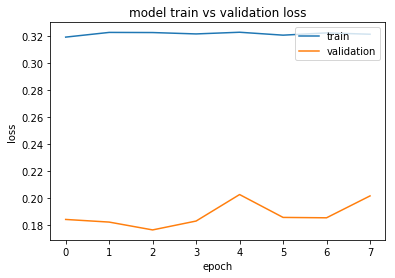

In [83]:
## Avaliando o Modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss'), 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [84]:
print("Loss: ", model2.evaluate(X_valid, y_valid, verbose=0))

Loss:  [0.2014742661745214, 0.926107890340965]


In [85]:
from sklearn.metrics import recall_score

In [86]:
from sklearn import metrics

In [87]:
probs = model2.predict_proba(X_valid)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_valid, preds)
roc_auc = metrics.auc(fpr, tpr)

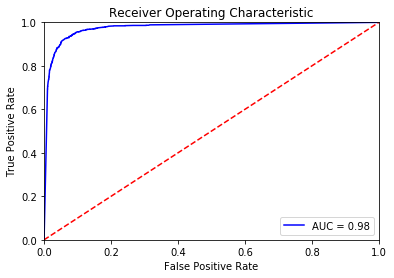

In [88]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
y2_predicted = np.round(model2.predict(X_test)).T[0]
y2_correct = np.array(y_test)

In [90]:
np.setdiff1d(y2_predicted, y2_correct)

array([], dtype=float32)

In [91]:
false_neg = 0
false_pos = 0
incorrect = 0
total = len(y_test)
for i in range(len(y_test)):
    if y2_predicted[i] != y2_correct[i]:
        incorrect += 1
        if y2_correct[i] == 1 and y2_predicted[i] == 0:
            false_neg += 1
        else:
            false_pos += 1

inaccuracy = incorrect / total

print('Inacurácia:', inaccuracy)
print('Acurácia:', 1 - inaccuracy)
if incorrect > 0:
    print('Taxa de Falsos Negativos:', false_neg/incorrect)
    print('Taxa de Falsos Positivos:', false_pos / incorrect )    
print('Falsos Negativos/total:', false_neg/total)

Inacurácia: 0.07676479234031831
Acurácia: 0.9232352076596817
Taxa de Falsos Negativos: 0.09409190371991247
Taxa de Falsos Positivos: 0.9059080962800875
Falsos Negativos/total: 0.007222945449964305


In [92]:
print('Validation Results')
print(recall_score(y_valid,np.round(model2.predict(X_valid)).T[0]))
print('\nTest Results')
print(1 - inaccuracy)
print(recall_score(y_test,np.round(model2.predict(X_test)).T[0]))

Validation Results
0.9336870026525199

Test Results
0.9232352076596817
0.9363669996300407


In [93]:
print(incorrect)

1828


Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      19454  1656    21110
True         172  2531     2703
__all__    19626  4187    23813


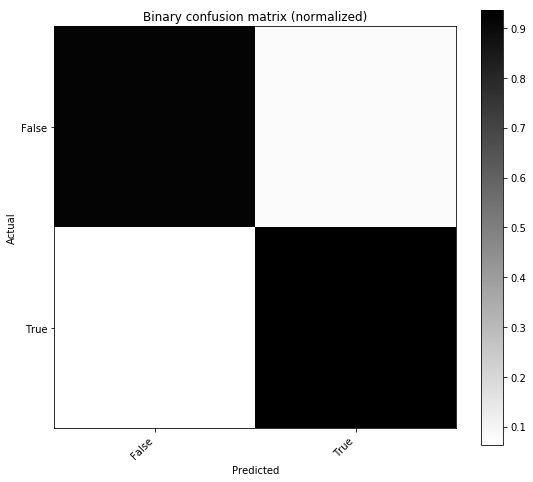

population: 23813
P: 2703
N: 21110
PositiveTest: 4187
NegativeTest: 19626
TP: 2531
TN: 19454
FP: 1656
FN: 172
TPR: 0.9363669996300407
TNR: 0.9215537659876836
PPV: 0.6044900883687605
NPV: 0.9912361153571793
FPR: 0.07844623401231644
FDR: 0.39550991163123955
FNR: 0.06363300036995931
ACC: 0.9232352076596817
F1_score: 0.7346879535558781
MCC: 0.7149027072260242
informedness: 0.8579207656177243
markedness: 0.5957262037259397
prevalence: 0.11350942762356696
LRP: 11.936417489245263
LRN: 0.06904968838335772
DOR: 172.86707251994153
FOR: 0.008763884642820748


In [94]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()

### Conclusão
O modelo de Deep Learning conseguiu atingir um excelente índice de acurácia no recall da classe minoritária, demonstrando ser uma ferramenta eficaz na identificação antecipada de pacientes que necessitarão de uma maior atenção da equipe assistencial, por possuir uma alta probabilidade de ocorrência de readmissão.



#### Referencias

Data Science Acabemy: Formação Inteligencia Artificial           
https://www.datascienceacademy.com.br/pages/formacao-inteligencia-artificial

Fator de Qualidade: dados de readmissão hospitalar devem ser informados à ANS   
http://www.ans.gov.br/aans/noticias-ans/qualidade-da-saude/3167-fator-de-qualidade-dados-de-readmissao-hospitalar-devem-ser-informados-a-ans

3 formas únicas de diminuir a readmissão hospitalar       
https://saudebusiness.com/noticias/3-formas-diminuir-readmissao-hospitalar/

Resampling strategies for imbalanced datasets       
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

The Right Way to Oversample in Predictive Modeling       
https://beckernick.github.io/oversampling-modeling/
